In [13]:
from sqlalchemy import create_engine, inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from datetime import date, time, datetime

#Dades de connexió

usuario='EquipoB'

contraseña="E1q2u3i4p5oB"
host='212.227.90.6'
puerto=3306
nombre_base_datos='EquipB'

#Crear la URL de la connexió
url_conexion=f"mysql+pymysql://{usuario}:{contraseña}@{host}:{puerto}/{nombre_base_datos}"

try:
    #Crear el engine de SQLAlchemy
    engine=create_engine(url_conexion)
    cnx=engine.connect()

    print("conexió correcta")
    #cnx.close()
except Exception as e:
    print(f"Error al conectar con SQLAlchemy: {e}")
    
#Recordar que inspect del codi anterior quan creo la connexió amb sqlalchemy
#from sqlalchemy import create_engine, inspect
inspector=inspect(engine)
nombre_tablas=inspector.get_table_names()

# Diccionario para almacenar los DataFrames
df= {}

for taula in nombre_tablas:
    query=f"select * from {taula}"
    
    try:
        df[taula] = pd.read_sql(query, cnx)
        print(f"Taula '{taula}' carregada correctament.")
    except Exception as e:
        print(f"Error al carregar la taula '{taula}':{e}")
  
# Tancar la connexió
cnx.close()

conexió correcta
Taula 'BANK_marketing' carregada correctament.


In [11]:
df_BANK_cliente=df['BANK_marketing']

In [9]:
df_BANK_vista_cliente=df_BANK_marketing[['id','age','job','marital','education','balance','housing','loan','deposit']]

NameError: name 'df_BANK_marketing' is not defined

In [6]:
df_BANK_vista_cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         11162 non-null  int64 
 1   age        11162 non-null  int64 
 2   job        11162 non-null  object
 3   marital    11162 non-null  object
 4   education  11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  int64 
 7   loan       11162 non-null  int64 
 8   deposit    11162 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 785.0+ KB


1. Análisis exploratorio de las características demográficas:

El objetivo es ver cómo cada variable demográfica influye en la probabilidad de que un cliente suscriba un producto financiero. Vamos a usar gráficos y estadísticas descriptivas para identificar tendencias.
a) Distribución de las variables categóricas en función de la suscripción:

Queremos observar cómo las variables job (empleo), marital (estado civil), education (educación), housing (hipoteca), y loan (préstamo) se distribuyen en función de si suscriben o no al depósito (deposit).

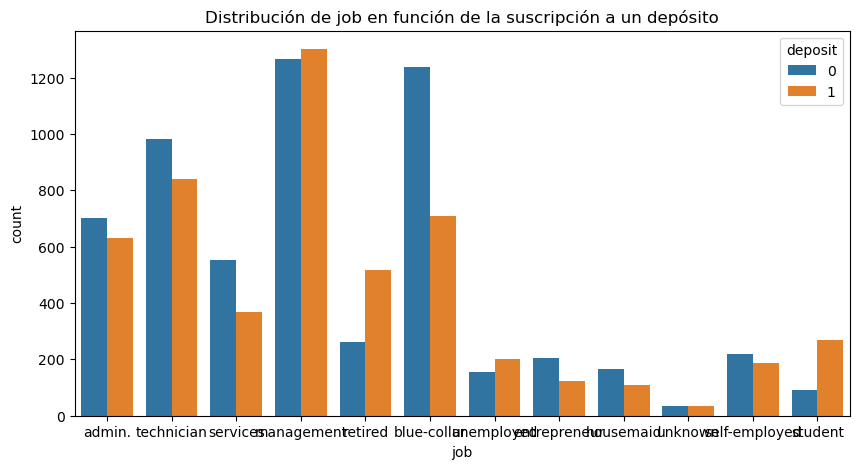

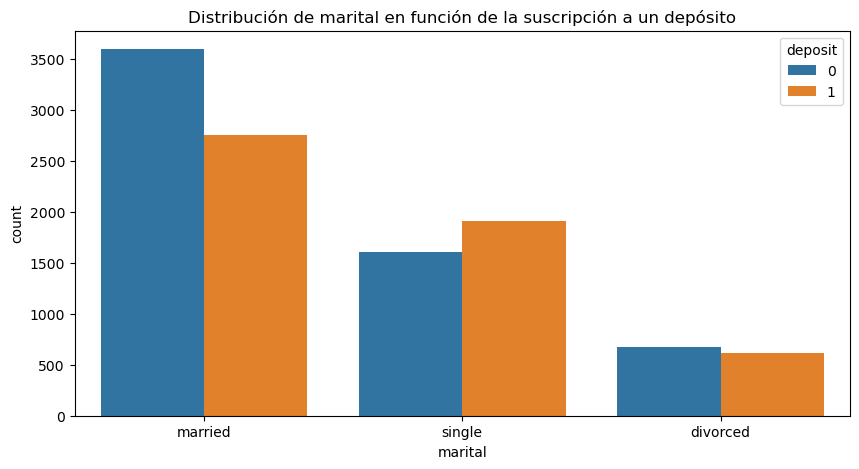

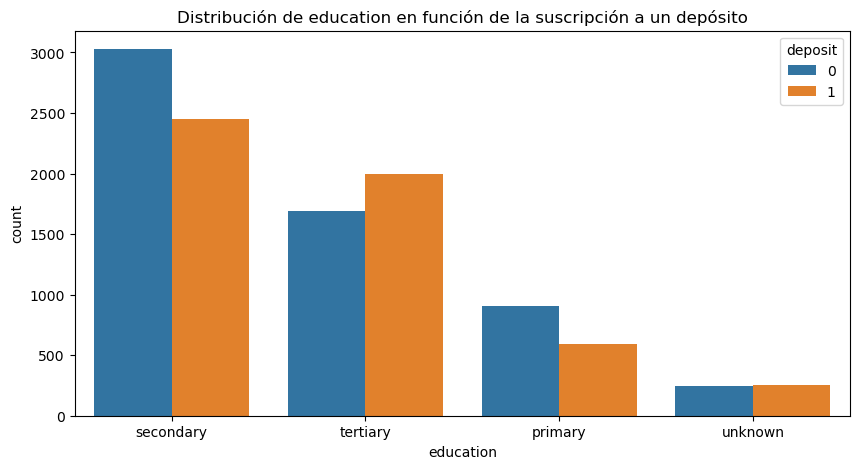

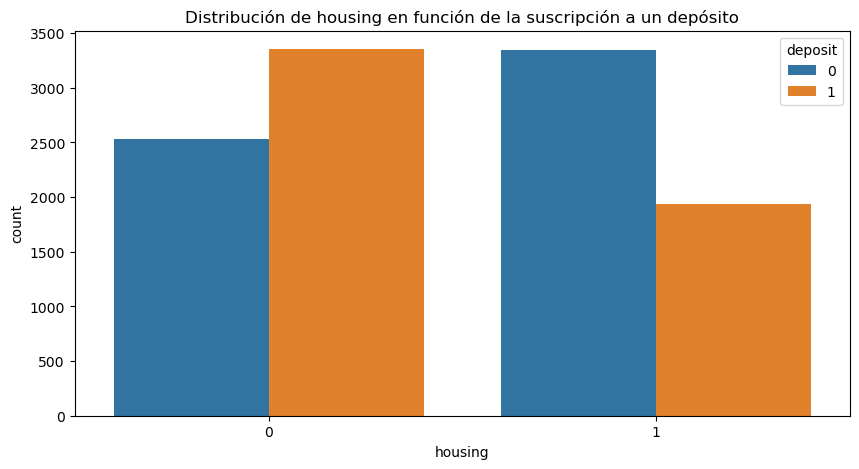

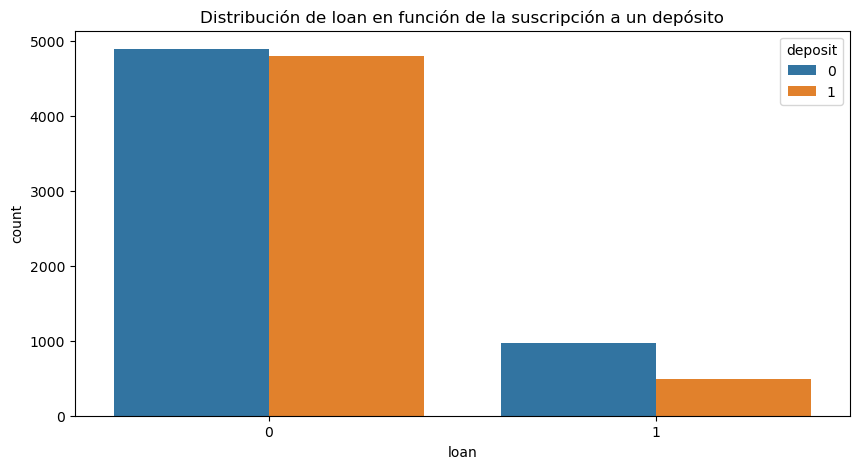

In [8]:
for col in ['job', 'marital', 'education', 'housing', 'loan']:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, hue='deposit', data=df_BANK_vista_cliente)
    plt.title(f"Distribución de {col} en función de la suscripción a un depósito")
    plt.show();

b) Análisis de las variables numéricas:

Además de las variables categóricas, podemos examinar la relación entre las variables edad (age) y balance (balance bancario) y la probabilidad de suscripción.

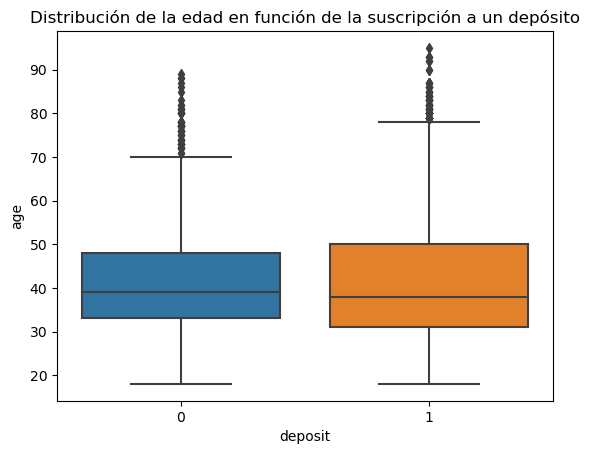

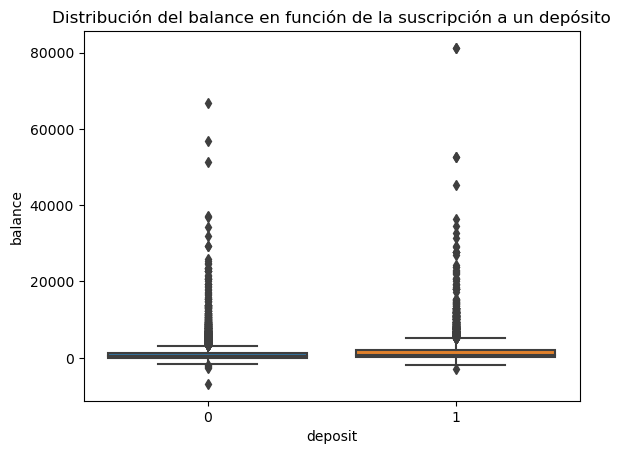

In [9]:
# Análisis de las variables numéricas 'age' y 'balance' con respecto a la suscripción
sns.boxplot(x='deposit', y='age', data=df_BANK_vista_cliente)
plt.title('Distribución de la edad en función de la suscripción a un depósito')
plt.show()

sns.boxplot(x='deposit', y='balance', data=df_BANK_vista_cliente)
plt.title('Distribución del balance en función de la suscripción a un depósito')
plt.show()


# AQUI VIENE LO BUENO

1. Análisis de la distribución de Housing y Loan:

Vamos a ver cómo se distribuyen las variables housing y loan entre los diferentes grupos demográficos.
a) Distribución de las variables categóricas para housing y loan:

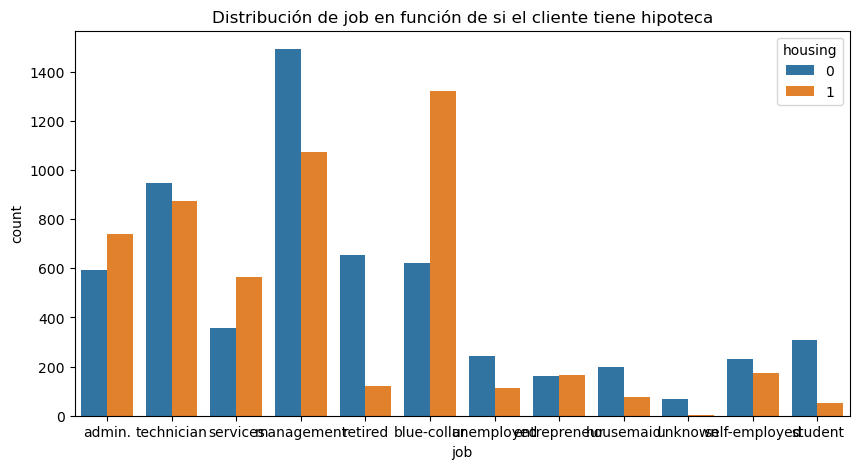

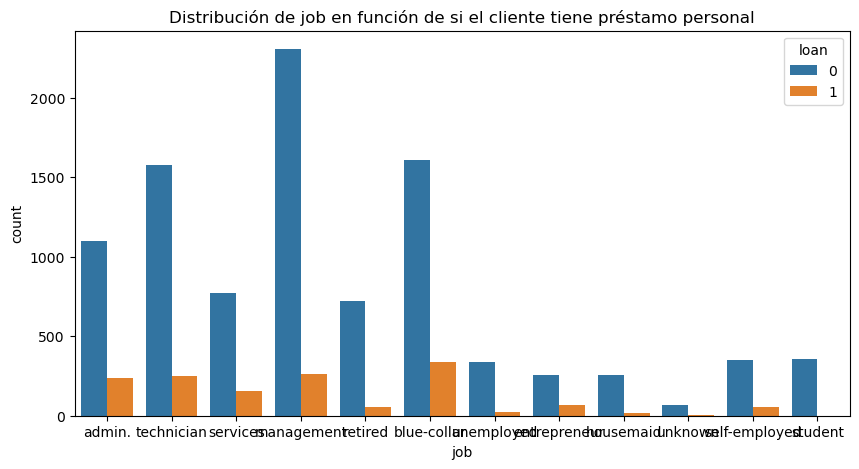

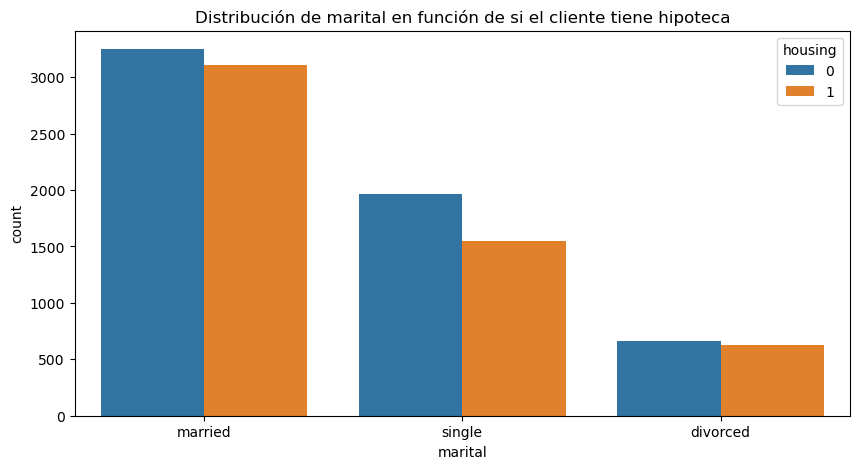

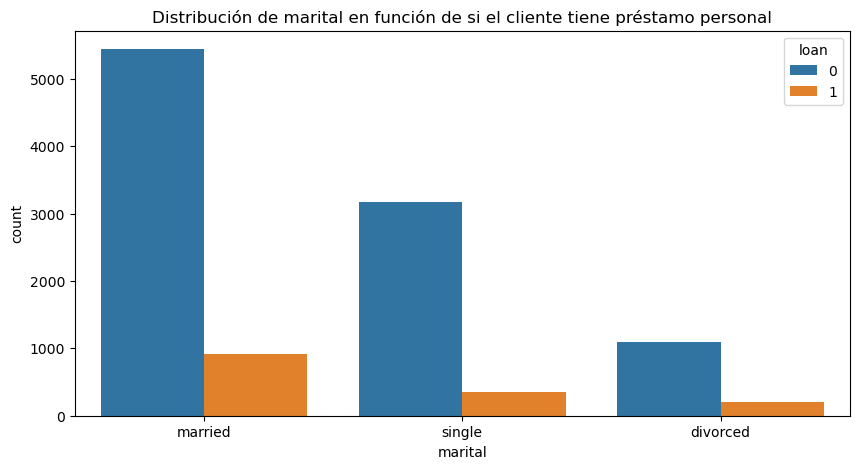

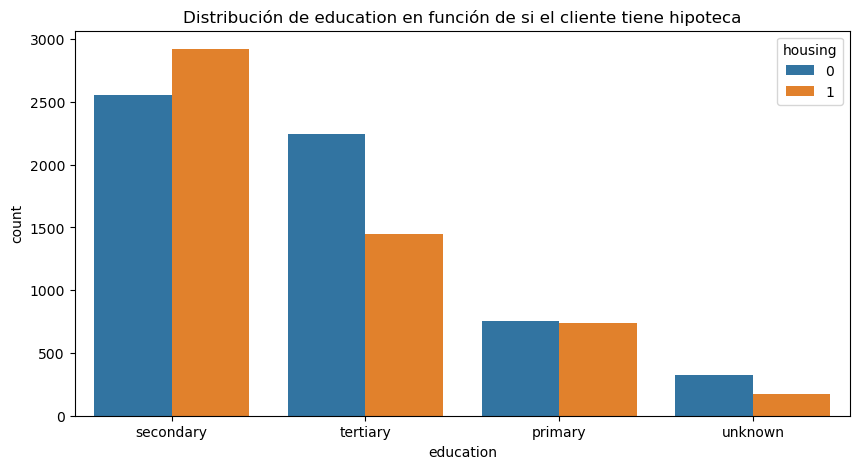

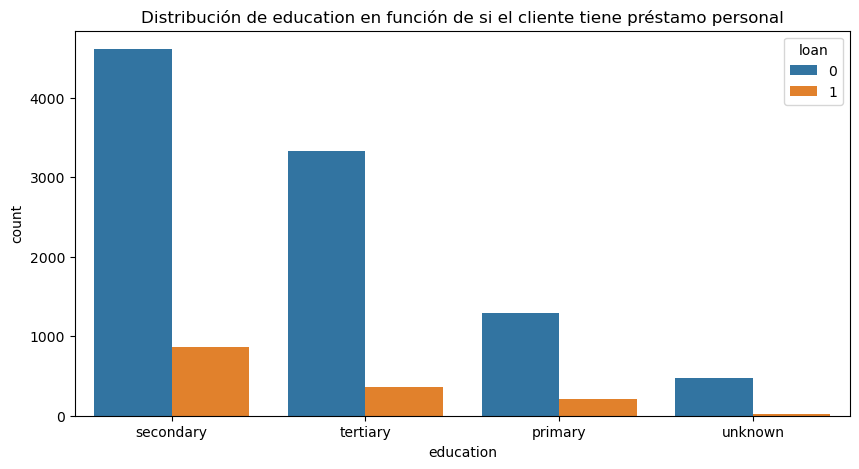

In [10]:
# Analizar la distribución de las variables categóricas en función de 'housing' y 'loan'
for col in ['job', 'marital', 'education']:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, hue='housing', data=df_BANK_vista_cliente)
    plt.title(f"Distribución de {col} en función de si el cliente tiene hipoteca")
    plt.show()

    plt.figure(figsize=(10,5))
    sns.countplot(x=col, hue='loan', data=df_BANK_vista_cliente)
    plt.title(f"Distribución de {col} en función de si el cliente tiene préstamo personal")
    plt.show()


b) Análisis de las variables numéricas:

Para las variables numéricas edad y balance, podemos ver cómo se relacionan con la posesión de una hipoteca o un préstamo.

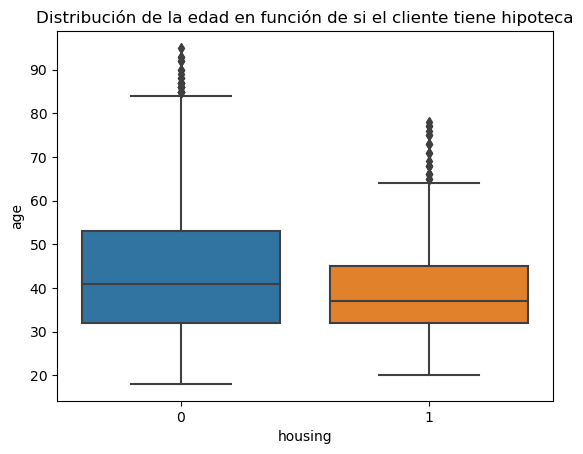

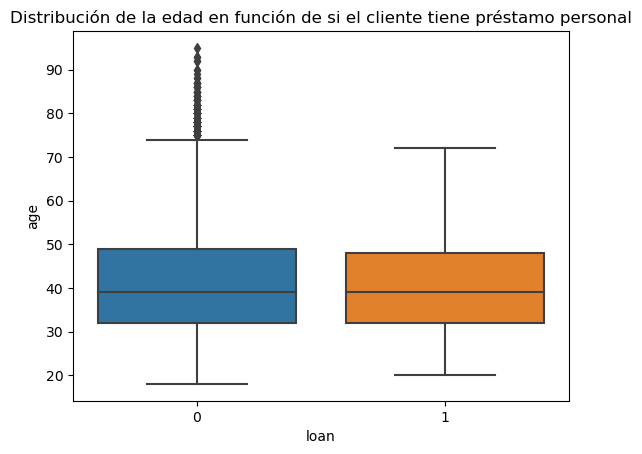

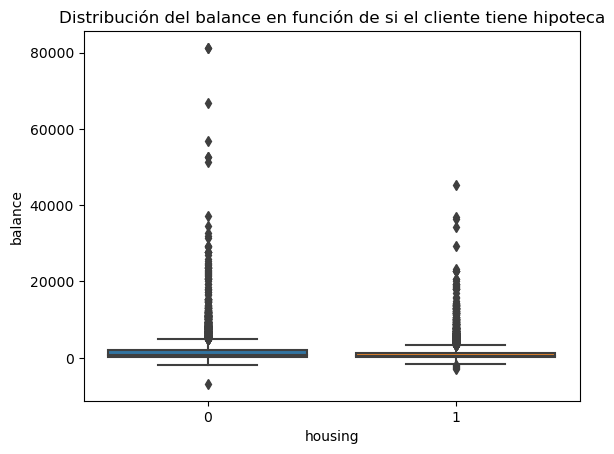

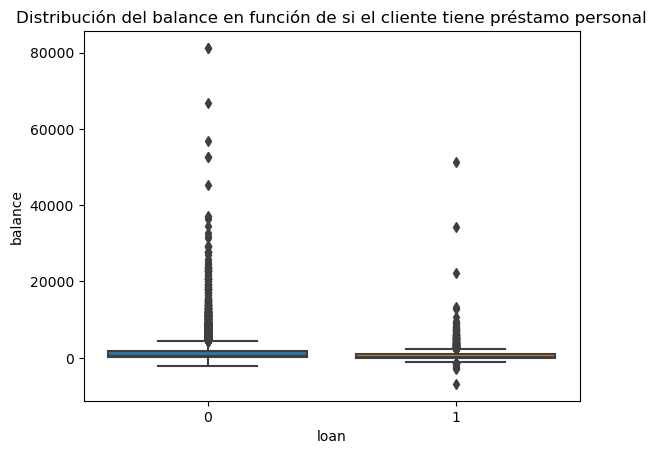

In [11]:
# Boxplot para ver la relación de 'age' y 'balance' con 'housing' y 'loan'
sns.boxplot(x='housing', y='age', data=df_BANK_vista_cliente)
plt.title('Distribución de la edad en función de si el cliente tiene hipoteca')
plt.show()

sns.boxplot(x='loan', y='age', data=df_BANK_vista_cliente)
plt.title('Distribución de la edad en función de si el cliente tiene préstamo personal')
plt.show()

sns.boxplot(x='housing', y='balance', data=df_BANK_vista_cliente)
plt.title('Distribución del balance en función de si el cliente tiene hipoteca')
plt.show()

sns.boxplot(x='loan', y='balance', data=df_BANK_vista_cliente)
plt.title('Distribución del balance en función de si el cliente tiene préstamo personal')
plt.show()


2. Modelo Predictivo para Identificar Clientes Propensos a Tener Hipotecas o Préstamos:
a) Modelado predictivo con Regresión logística o Random Forest:

Podemos ajustar un modelo para predecir la probabilidad de que un cliente tenga una hipoteca (housing) o un préstamo (loan) basándonos en su perfil demográfico y financiero.

python

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Convertir variables categóricas a numéricas
le = LabelEncoder()
for col in ['job', 'marital', 'education']:
    df_BANK_vista_cliente[col] = le.fit_transform(df_BANK_vista_cliente[col])

# Dividir los datos para 'housing'
X = df_BANK_vista_cliente.drop(['housing', 'loan', 'deposit'], axis=1)
y_housing = df_BANK_vista_cliente['housing']
y_loan = df_BANK_vista_cliente['loan']

# Dividir en conjuntos de entrenamiento y prueba para 'housing'
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(X, y_housing, test_size=0.3, random_state=42)

# Dividir en conjuntos de entrenamiento y prueba para 'loan'
X_train_loan, X_test_loan, y_train_loan, y_test_loan = train_test_split(X, y_loan, test_size=0.3, random_state=42)

# Modelo Random Forest para 'housing'
model_housing = RandomForestClassifier(random_state=42)
model_housing.fit(X_train_housing, y_train_housing)
accuracy_housing = model_housing.score(X_test_housing, y_test_housing)
print(f"Precisión del modelo para hipoteca (housing): {accuracy_housing:.2f}")

# Modelo Random Forest para 'loan'
model_loan = RandomForestClassifier(random_state=42)
model_loan.fit(X_train_loan, y_train_loan)
accuracy_loan = model_loan.score(X_test_loan, y_test_loan)
print(f"Precisión del modelo para préstamo (loan): {accuracy_loan:.2f}")

# Importancia de las variables
importances_housing = model_housing.feature_importances_
importances_loan = model_loan.feature_importances_
features = X.columns

# Mostrar la importancia de las variables
importance_df_housing = pd.DataFrame({'Feature': features, 'Importance': importances_housing}).sort_values(by='Importance', ascending=False)
importance_df_loan = pd.DataFrame({'Feature': features, 'Importance': importances_loan}).sort_values(by='Importance', ascending=False)

print("Importancia de las variables para 'housing' (hipoteca):")
print(importance_df_housing)

print("Importancia de las variables para 'loan' (préstamo):")
print(importance_df_loan)


C:\Users\Gman\AppData\Local\Temp\ipykernel_27512\2762716791.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BANK_vista_cliente[col] = le.fit_transform(df_BANK_vista_cliente[col])
C:\Users\Gman\AppData\Local\Temp\ipykernel_27512\2762716791.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BANK_vista_cliente[col] = le.fit_transform(df_BANK_vista_cliente[col])
C:\Users\Gman\AppData\Local\Temp\ipykernel_27512\2762716791.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

Precisión del modelo para hipoteca (housing): 0.67
Precisión del modelo para préstamo (loan): 0.87
Importancia de las variables para 'housing' (hipoteca):
     Feature  Importance
0         id    0.345023
5    balance    0.267064
1        age    0.215215
2        job    0.095542
4  education    0.039249
3    marital    0.037907
Importancia de las variables para 'loan' (préstamo):
     Feature  Importance
0         id    0.330060
5    balance    0.320777
1        age    0.199478
2        job    0.076159
4  education    0.038439
3    marital    0.035087


Análisis del Perfil de Clientes para Productos Financieros: Hipotecas y Préstamos

En este análisis, hemos utilizado un modelo de Random Forest para predecir la probabilidad de que un cliente tenga una hipoteca o un préstamo personal en función de su perfil demográfico y financiero. Estos son los resultados principales:
1. Hipoteca (Housing)

    Precisión del modelo: El modelo predictivo para identificar si un cliente tiene una hipoteca tiene una precisión del 67%. Esto significa que el modelo puede predecir correctamente en un 67% de los casos si un cliente tiene una hipoteca basándose en las características del cliente.

    Importancia de las variables:
        ID (34.5%): Aunque sorprendente, esto puede indicar que hay alguna relación directa o indirecta entre las características únicas del cliente y la posesión de hipoteca, pero esto podría ser un efecto del dataset (por ejemplo, si los datos están ordenados de alguna manera o hay un sesgo no identificado).
        Balance (26.7%): El balance financiero del cliente es una de las variables más importantes. Los clientes con balances más altos tienden a tener hipotecas, lo cual tiene sentido porque la capacidad financiera es clave para acceder a productos como hipotecas.
        Edad (21.5%): La edad también es un factor significativo. Los clientes de mayor edad, en su mayoría, suelen haber acumulado activos o estar en una etapa de su vida donde ya poseen una hipoteca.
        Empleo (9.7%) y Educación (3.9%): Aunque estas variables tienen menos peso, aún contribuyen a la predicción. Profesiones estables y niveles educativos más altos pueden estar correlacionados con la adquisición de hipotecas.

2. Préstamo Personal (Loan)

    Precisión del modelo: El modelo predictivo para identificar si un cliente tiene un préstamo personal es más preciso, con una precisión del 87%. Esto indica que el modelo puede predecir con alta precisión si un cliente tiene un préstamo personal, basándose en su perfil.

    Importancia de las variables:
        ID (33.0%): Al igual que en el caso de la hipoteca, el ID aparece como un factor relevante, posiblemente indicando alguna estructura en los datos que aún no se ha controlado.
        Balance (32.1%): El balance vuelve a ser una variable clave para predecir si un cliente tiene un préstamo personal. Los clientes con balances más bajos pueden tener más probabilidades de solicitar préstamos personales para cubrir gastos adicionales.
        Edad (19.9%): La edad también es importante. Clientes más jóvenes pueden ser más propensos a adquirir préstamos personales para necesidades inmediatas como educación, compras o deudas.
        Empleo (7.6%) y Educación (8.3%): El empleo y el nivel educativo también influyen en la probabilidad de tener un préstamo. Al igual que en el caso de las hipotecas, aquellos con trabajos más estables o con niveles de educación más altos pueden ser mejores candidatos para productos financieros de este tipo.

Conclusiones y Recomendaciones

    Balance y edad son factores consistentes que influyen significativamente tanto en la posesión de hipotecas como de préstamos personales. Esto tiene sentido porque los clientes con balances más altos tienen una mejor capacidad para adquirir productos financieros, mientras que la edad afecta su experiencia y necesidades financieras.

    El empleo y la educación, aunque tienen menor importancia en la predicción, son igualmente relevantes para identificar los perfiles más propensos a adquirir productos financieros.

Acciones sugeridas:

    Segmentación del marketing: Basado en estos resultados, las campañas de marketing podrían enfocarse en clientes con balances más altos y ciertas edades para promocionar productos financieros como hipotecas o préstamos personales.

    Optimización de productos: El análisis sugiere que las instituciones financieras pueden desarrollar productos personalizados para ciertos grupos de edad o balance financiero, dado que estos factores influyen fuertemente en la posesión de productos financieros.